In [3]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

ModuleNotFoundError: No module named 'numpy'

**Objective is to predict the price of houses. There are 3 possible feature/predictor variables: Income, age of the house, and population**

**We will develop a univariate and then a multivariate model, and will comapare the merits of the two models**

In [3]:
#Reading the .csv file

housing = pd.read_csv('USA_Housing.csv')
housing

,Area Income,Area House Age,Area Population,Price,Address
0,79545,5.68,23087,1059034,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79249,6.00,40173,1505891,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287,5.87,36882,1058988,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345,7.19,34310,1260617,USS Barnett\nFPO AP 44820
4,59982,5.04,26354,630943,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...
4995,60568,7.83,22837,1060194,USNS Williams\nFPO AP 30153-7653
4996,78491,7.00,25616,1482618,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63391,7.25,33266,1030730,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001,5.53,42626,1198657,USS Wallace\nFPO AE 73316


In [4]:
#Getting the information (i.e, the number of rows and the data types present in each column) and the basic statistical measures 
#about the dataframe 'housing' using the info() and describe() functions available in the Pandas library.

housing.info()

housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area Income      5000 non-null   int64  
 1   Area House Age   5000 non-null   float64
 2   Area Population  5000 non-null   int64  
 3   Price            5000 non-null   int64  
 4   Address          5000 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 195.4+ KB


,Area Income,Area House Age,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.103800,5.977278,36163.512200,1.232073e+06
std,10657.990158,0.991437,9925.651196,3.531176e+05
min,17797.000000,2.640000,173.000000,1.593900e+04
25%,61480.500000,5.320000,29404.000000,9.975775e+05
50%,68804.500000,5.970000,36199.000000,1.232669e+06
75%,75783.000000,6.650000,42861.000000,1.471210e+06
max,107702.000000,9.520000,69622.000000,2.469066e+06


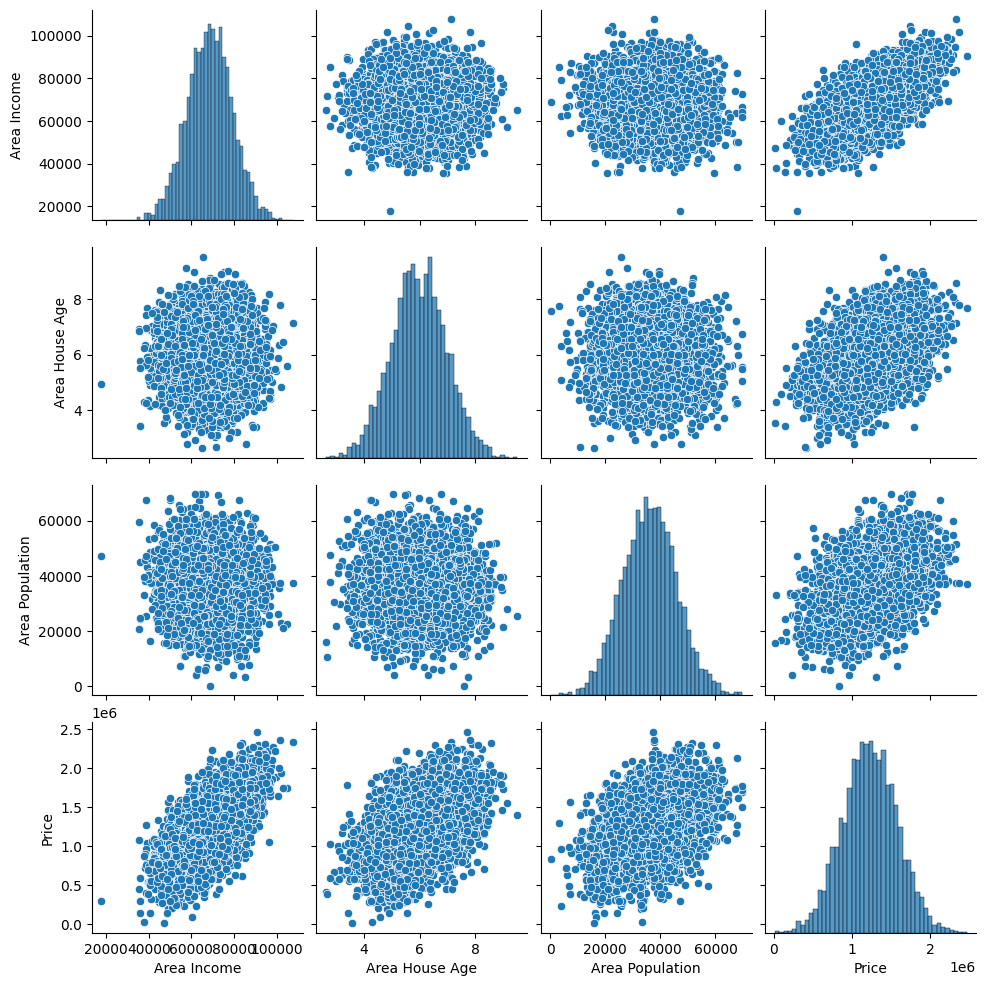

In [5]:
#Scatter plot between all the columns in the dataset using the pairplot() function in the Seaborn library.

sns.pairplot(housing)

In [6]:
### removing outlier in the Area Income column  

housing=housing.drop(housing[housing["Area Income"]<20000].index)

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area Income      4999 non-null   int64  
 1   Area House Age   4999 non-null   float64
 2   Area Population  4999 non-null   int64  
 3   Price            4999 non-null   int64  
 4   Address          4999 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 234.3+ KB


In [8]:
## picking the columns of interest
data = housing.iloc[:, 0:4]
data.head()
data.describe()

,Area Income,Area House Age,Area Population,Price
count,4999.000000,4999.000000,4999.000000,4.999000e+03
mean,68593.263053,5.977483,36161.312062,1.232259e+06
std,10634.816714,0.991430,9925.424696,3.529080e+05
min,35455.000000,2.640000,173.000000,1.593900e+04
25%,61481.500000,5.320000,29404.000000,9.977230e+05
50%,68805.000000,5.970000,36198.000000,1.232872e+06
75%,75784.000000,6.650000,42852.500000,1.471389e+06
max,107702.000000,9.520000,69622.000000,2.469066e+06


Text(0.5, 1.0, 'Feature Correlation Heatmap')

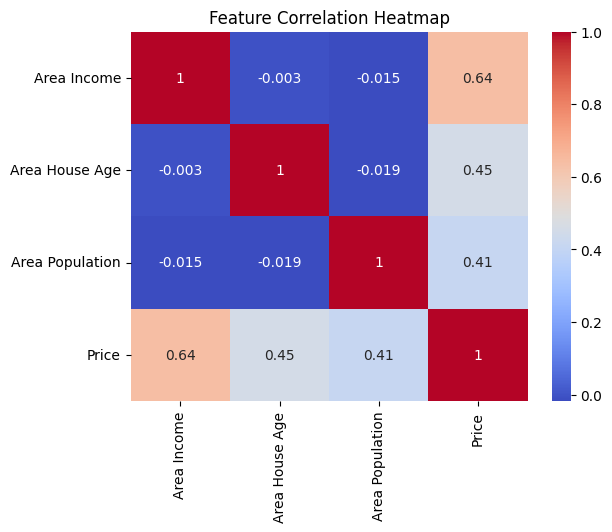

In [9]:
#Computing the correlation coefficient between all the columns in the dataset and displaying them as a heat map using the 
#heatmap() function in the Seaborn library

corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")

## Implementation of the linear regression algorithm using the Scikit-Learn library:

### Lets make univariate model and see 

**Prediction based on Area income only:**


In [10]:
## step 1: define input and output variables

x = data.iloc[:, 0:1]
y = data.iloc[:, 3]

x

,Area Income
0,79545
1,79249
2,61287
3,63345
4,59982
...,...
4995,60568
4996,78491
4997,63391
4998,68001


In [11]:
## step 2: perform train-test splitting

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3333)

In [12]:
x_train

,Area Income
2510,70220
3184,60757
3920,66750
4165,72120
3133,73870
...,...
2228,80948
3376,78069
4453,81463
1278,61479


In [13]:
#Training the model based on 'x_train and y_train' and getting the coefficients and the intercept

from sklearn.linear_model import LinearRegression
model = LinearRegression()

fit_model=model.fit(x_train,y_train)

print(fit_model.coef_)
print(fit_model.intercept_)

[20.91264017]
-203480.38137327484


In [14]:
# applying the model on the training set

y_train_pred = fit_model.predict(x_train)
x_train["Price"]=y
x_train["Pred price"]=y_train_pred
x_train


,Area Income,Price,Pred price
2510,70220,1555498,1.265005e+06
3184,60757,482690,1.067109e+06
3920,66750,1394638,1.192438e+06
4165,72120,1447672,1.304739e+06
3133,73870,1513847,1.341336e+06
...,...,...,...
2228,80948,1838092,1.489356e+06
3376,78069,1004430,1.429149e+06
4453,81463,1573289,1.500126e+06
1278,61479,637190,1.082208e+06


Text(0.5, 1.0, 'Predictions vs. actual values in the training set')

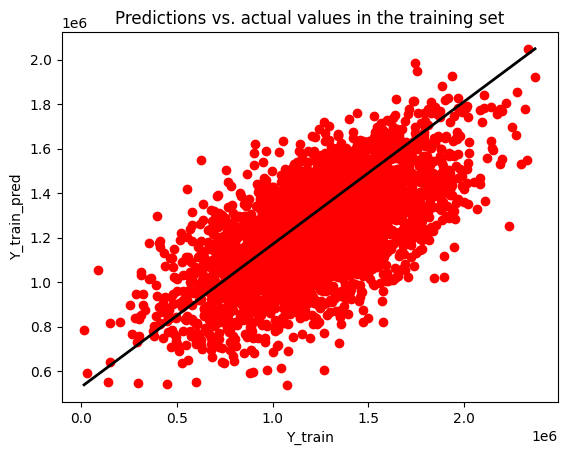

In [15]:
plt.scatter(y_train,y_train_pred,color='r')
plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set")

In [16]:
#Testing the model on the test set

y_test_pred = model.predict(x_test)
x_test["Price"]=y_test
x_test["Pred price"]=y_test_pred
x_test


,Area Income,Price,Pred price
983,68854,1485677,1.236439e+06
1940,78899,1280548,1.446506e+06
1966,61655,1131533,1.085888e+06
2420,91084,1737982,1.701327e+06
3983,56374,856208,9.754488e+05
...,...,...,...
3542,82061,845890,1.512632e+06
2545,77460,945252,1.416413e+06
4860,59349,893541,1.037664e+06
11,50594,663732,8.545737e+05


Text(0.5, 1.0, 'Predictions vs. actual values in the test set')

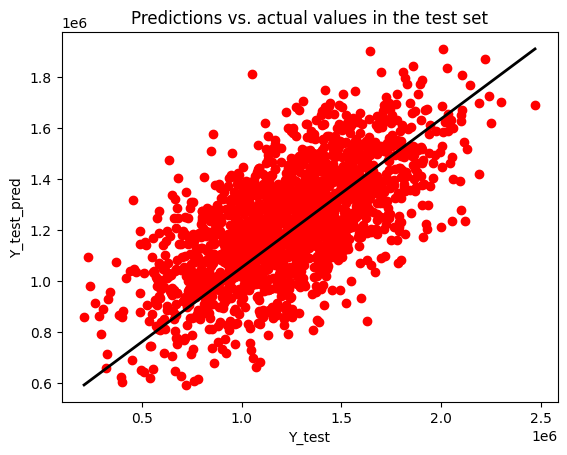

In [17]:
plt.scatter(y_test,y_test_pred,color='r')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.title("Predictions vs. actual values in the test set")

In [18]:
#Computing the MSE and the RMSE values for the predictions made on the training set

from sklearn import metrics

MSE_train = metrics.mean_squared_error(y_train, y_train_pred)
RMSE_train = np.sqrt(MSE_train)   
                                       
print(MSE_train)
print(RMSE_train)

72590083275.03477
269425.468868544


In [19]:
#Computing the MSE and the RMSE values for the predictions made on the test set

MSE_test = metrics.mean_squared_error(y_test, y_test_pred)
RMSE_test = np.sqrt(MSE_test)  

print(MSE_test)
print(RMSE_test)

75822141603.55177
275358.2059854977


## Build a multivriate model now and see if there is improvement

In [20]:
#Assigning the 3 feature columns to a variable named 'x' and assigning the response variable column to a variable named 'y'

x = data.iloc[:, 0:3]
y = data.iloc[:, 3]
x

,Area Income,Area House Age,Area Population
0,79545,5.68,23087
1,79249,6.00,40173
2,61287,5.87,36882
3,63345,7.19,34310
4,59982,5.04,26354
...,...,...,...
4995,60568,7.83,22837
4996,78491,7.00,25616
4997,63391,7.25,33266
4998,68001,5.53,42626


In [21]:
#Splitting the dataset into training set and the test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3333)

In [22]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()

fit_model=model.fit(x_train,y_train)

print(fit_model.coef_)
print(fit_model.intercept_)

[2.15463241e+01 1.63845075e+05 1.52169195e+01]
-1772178.0163454863


In [23]:
y_train_pred = fit_model.predict(x_train)
x_train["Price"]=y
x_train["Pred price"]=y_train_pred
x_train

,Area Income,Area House Age,Area Population,Price,Pred price
397,69307,5.56,36851,1181877,1.192870e+06
1968,72178,6.45,28394,1650771,1.271863e+06
2391,64635,5.17,37867,1226067,1.043767e+06
3284,49410,7.12,27805,846841,8.821092e+05
277,57234,7.89,37375,1211655,1.322474e+06
...,...,...,...,...,...
1920,69529,6.06,33176,995137,1.223654e+06
2464,59866,4.64,30905,613788,7.482343e+05
1589,64811,6.19,40549,1153135,1.255493e+06
815,63880,4.88,56267,1224455,1.259976e+06


Text(0.5, 1.0, 'Predictions vs. actual values in the training set')

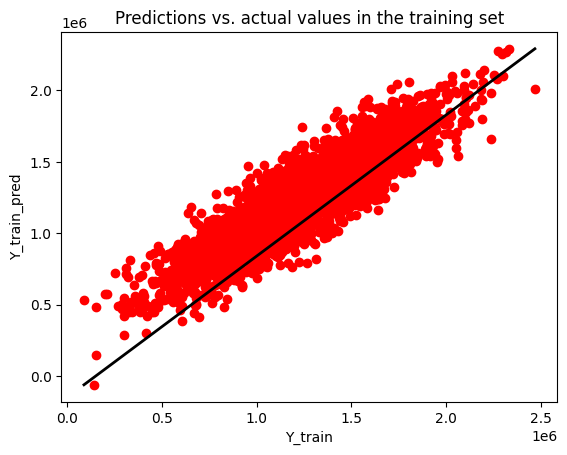

In [30]:
plt.scatter(y_train,y_train_pred,color='r')
plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set")

In [25]:
#Testing the model on the test set

y_test_pred = model.predict(x_test)
x_test["Price"]=y_test
x_test["Pred price"]=y_test_pred
x_test


,Area Income,Area House Age,Area Population,Price,Pred price
518,62850,6.25,37764,1277297,1.180692e+06
209,76327,5.02,42780,1261844,1.345870e+06
1715,88306,6.77,32190,1591384,1.729555e+06
2301,69275,6.13,40145,1233205,1.335697e+06
805,88698,4.74,29936,1222761,1.371097e+06
...,...,...,...,...,...
1230,76365,4.54,19992,1132146,9.212803e+05
2411,72752,5.20,29034,692229,1.089163e+06
1645,71639,6.57,28995,945931,1.289056e+06
1238,51815,5.74,43605,1255202,9.482493e+05


Text(0.5, 1.0, 'Predictions vs. actual values in the test set')

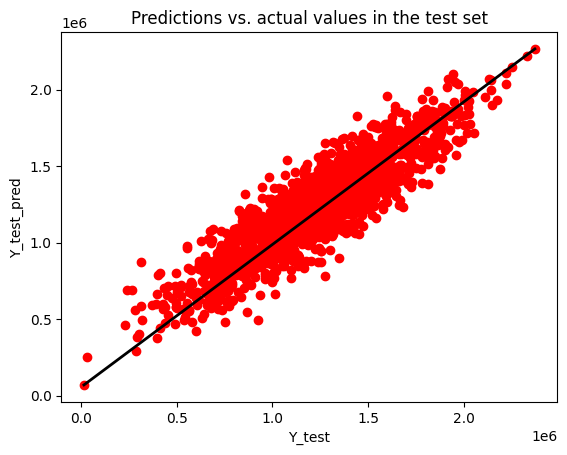

In [26]:
plt.scatter(y_test,y_test_pred,color='r')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.title("Predictions vs. actual values in the test set")

In [27]:
#Computing the MSE and the RMSE values for the predictions made on the training set

from sklearn import metrics

MSE_train = metrics.mean_squared_error(y_train, y_train_pred)
RMSE_train = np.sqrt(MSE_train)   
                                       
print(MSE_train)
print(RMSE_train)

25345974635.26255
159204.19163848215


In [28]:
#Computing the MSE and the RMSE values for the predictions made on the test set

MSE_test = metrics.mean_squared_error(y_test, y_test_pred)
RMSE_test = np.sqrt(MSE_test)  

print(MSE_test)
print(RMSE_test)

24861071164.342747
157673.93939501463
